# ***Processing with log(Cs-137 activity concentration) data in stem woody biomass for forest sites***

# Load all data from .xlxs file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
site_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/4_RN_content_in_wood/Unit_site_data.xlsx'
df = pd.read_excel(site_data, sheet_name='RN_filtration_data')
df.head()

,Ідентифікатор,Site #,Species,Species_ID,Ntrees at site,% composition,D_cm,H_m,G_m2_ha,N_ha,...,T_ag_Cs,ln_T_ag_Cs,T_ag_Sr,ln_T_ag_Sr,AEDR_count,AEDR_mean,AEDR_median,AEDR_std,Distance_km,Azimuth
0,214,095_2021,Pine,0,40,100.000000,9.173331,8.917017,26.454278,4000,...,0.009303,-4.677466,17.136062,2.841185,30,0.141667,0.14,0.009339,51.395430,246
1,472,060_2021,Robinia,5,39,42.287838,10.248202,20.161437,12.869754,1560,...,0.015607,-4.160037,6.328208,1.845017,21,10.249524,10.20,0.923954,33.428831,254
2,218,096_2021,Birch,2,35,100.000000,17.188036,20.614192,32.488588,1400,...,0.016439,-4.108084,0.800387,-0.222660,26,0.381538,0.39,0.044522,54.895591,247
3,430,051_2021,Pine,0,24,100.000000,22.133120,13.684873,36.940844,960,...,0.018700,-3.979215,4.799847,1.568584,31,0.552581,0.56,0.071300,17.571824,265
4,204,092_2021,Birch,2,41,100.000000,28.217794,27.000746,25.643676,410,...,0.019196,-3.953053,2.440077,0.892029,34,0.204412,0.20,0.017689,51.095388,246


In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_ha',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr'])
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin,Origin_ID,A_year,D_live_cm,...,G_live_m2_ha,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr
0,Pine,0,100.000000,9.173331,8.917017,26.454278,n,0,20,9.173331,...,26.454278,3,2,0.141667,51.395430,246,752.481287,9.803886,1.945910,5.123964
1,Robinia,5,42.287838,10.248202,20.161437,12.869754,n,0,40,13.518680,...,30.433701,3,3,10.249524,33.428831,254,5189.986119,225.972345,4.394449,7.265430
2,Birch,2,100.000000,17.188036,20.614192,32.488588,n,0,30,17.188036,...,32.488588,2,3,0.381538,54.895591,247,1034.110727,17.866359,2.833213,2.660260
3,Pine,0,100.000000,22.133120,13.684873,36.940844,n,0,20,22.133120,...,36.940844,2,2,0.552581,17.571824,265,588.225430,144.587942,2.397895,6.542472
4,Birch,2,100.000000,28.217794,27.000746,25.643676,a,1,57,28.217794,...,25.643676,2,2,0.204412,51.095388,246,677.224124,12.294696,2.564949,3.401197


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        209 non-null    object 
 1   Species_ID     209 non-null    int64  
 2   % composition  209 non-null    float64
 3   D_cm           209 non-null    float64
 4   H_m            209 non-null    float64
 5   G_m2_ha        209 non-null    float64
 6   Origin         209 non-null    object 
 7   Origin_ID      209 non-null    int64  
 8   A_year         209 non-null    int64  
 9   D_live_cm      209 non-null    float64
 10  H_live_m       209 non-null    float64
 11  G_live_m2_ha   209 non-null    float64
 12  F_Soil_ID      209 non-null    int64  
 13  M_Soil         209 non-null    int64  
 14  AEDR_mean      209 non-null    float64
 15  Distance_km    209 non-null    float64
 16  Azimuth        209 non-null    int64  
 17  Cs_2021_kBq_m  209 non-null    float64
 18  Sr_2021_kB

In [5]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin_ID,A_year,D_live_cm,H_live_m,G_live_m2_ha,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1.057416,94.337925,17.770981,16.978858,30.000765,0.454545,47.464115,17.555614,16.999369,31.436810,1.918660,2.220096,2.526858,14.640059,174.296651,2040.059453,670.875816,5.964225,7.381811
std,1.524339,14.155594,8.921738,6.832292,15.907971,0.499125,24.724635,8.470174,6.783414,15.470759,0.634039,0.692944,4.756383,12.363729,99.912885,3821.573719,1529.917216,2.095016,2.042856
min,0.000000,20.805369,1.914854,2.704460,0.259356,0.000000,10.000000,1.874874,2.704460,0.656684,1.000000,0.000000,0.110000,3.998568,9.000000,28.815348,2.402062,1.504077,2.406945
25%,0.000000,96.775081,11.601519,12.401789,17.519173,0.000000,30.000000,12.307179,12.193980,20.938452,2.000000,2.000000,0.460000,6.562497,56.000000,446.906289,44.007562,4.110874,5.752573
50%,0.000000,100.000000,16.817809,17.466646,30.845307,0.000000,45.000000,16.780740,17.365162,31.800484,2.000000,2.000000,0.756000,9.203749,189.000000,708.799781,187.465954,6.309918,7.506592
75%,2.000000,100.000000,22.264253,21.414562,42.817263,1.000000,60.000000,22.023624,21.604236,43.193896,2.000000,3.000000,2.401667,20.865459,261.000000,1940.992207,442.523198,7.306531,8.846497
max,5.000000,100.000000,52.228464,34.048688,66.922093,1.000000,150.000000,41.664506,33.436497,71.679126,3.000000,4.000000,36.591739,57.286577,342.000000,25173.384978,10477.431302,11.366743,13.864301


In [6]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species","Origin"])["ln_A_Cs","ln_A_Sr"].describe()

<ipython-input-6-ff3f10595533>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Species","Origin"])["ln_A_Cs","ln_A_Sr"].describe()


ln_A_Cs                                                    \
                 count      mean       std       min       25%       50%   
Species Origin                                                             
Alder   n         13.0  6.249674  1.661129  3.295837  5.840642  6.040255   
Aspen   n          9.0  5.584313  3.039601  2.708050  3.295837  4.204693   
Birch   a          8.0  4.362177  2.328619  2.564949  2.827543  3.233849   
        n         37.0  6.034944  2.148756  2.079442  4.488636  6.363028   
Oak     a          4.0  8.028237  2.843374  3.891820  7.345698  9.021902   
        n          3.0  5.397258  2.735149  2.397895  4.219075  6.040255   
Pine    a         79.0  6.394467  1.794226  1.526056  5.172417  6.811244   
        n         51.0  5.557900  2.118875  1.504077  3.783156  5.659482   
Red oak a          3.0  3.445685  0.588708  2.833213  3.164860  3.496508   
Robinia n          1.0  4.394449       NaN  4.394449  4.394449  4.394449   
Spruce  a          1.0  5.176150       NaN  5.176150  5.176150  5.176150   

                                    ln_A_Sr                                \
                     75%        max   count      mean       std       min   
Species Origin                                                              
Alder   n       6.940222   9.287301    13.0  6.055811  1.449620  4.094345   
Aspen   n       6.729824  11.366743     9.0  7.575485  2.597130  4.615121   
Birch   a       5.514399   9.296518     8.0  6.723859  2.848366  3.401197   
        n       7.306531  10.332018    37.0  7.876554  2.178501  2.660260   
Oak     a       9.704441  10.177324     4.0  8.028961  3.011778  3.931826   
        n       6.896939   7.753624     3.0  6.067628  1.994720  3.871201   
Pine    a       7.413919  10.468801    79.0  7.586615  1.908352  2.406945   
        n       6.951761  10.328755    51.0  7.291517  1.863717  4.317488   
Red oak a       3.751920   4.007333     3.0  4.697638  0.334751  4.418841   
Robinia n       4.394449   4.394449     1.0  7.265430       NaN  7.265430   
Spruce  a       5.176150   5.176150     1.0  7.783224       NaN  7.783224   

                                                         
                     25%       50%       75%        max  
Species Origin                                           
Alder   n       4.442651  6.302619  7.286192   7.649693  
Aspen   n       5.209486  7.870930  8.881836  11.180246  
Birch   a       5.087325  5.586554  8.559757  11.957611  
        n       6.873164  7.824046  8.995909  13.864301  
Oak     a       7.072729  8.529114  9.485347  11.125791  
        n       5.218233  6.565265  7.165841   7.766417  
Pine    a       6.293930  8.022897  8.896975  11.378251  
        n       6.107615  6.917706  8.327879  12.687263  
Red oak a       4.512005  4.605170  4.837037   5.068904  
Robinia n       7.265430  7.265430  7.265430   7.265430  
Spruce  a       7.783224  7.783224  7.783224   7.783224

In [7]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = ["ln_A_Cs"], inplace=True) # IMPOTANT - input name of column
print(select)

     Species  Species_ID  % composition       D_cm        H_m    G_m2_ha  \
0       Pine           0     100.000000   9.173331   8.917017  26.454278   
1    Robinia           5      42.287838  10.248202  20.161437  12.869754   
2      Birch           2     100.000000  17.188036  20.614192  32.488588   
3       Pine           0     100.000000  22.133120  13.684873  36.940844   
4      Birch           2     100.000000  28.217794  27.000746  25.643676   
..       ...         ...            ...        ...        ...        ...   
204     Pine           0     100.000000  13.411189  13.346519  28.256274   
205    Birch           2      28.448276   1.914854   4.359681   0.259356   
206    Aspen           4      99.930119  11.401754  14.676282  17.972410   
207     Pine           0      96.284658  16.557714  17.797635  32.733666   
208     Pine           0     100.000000  13.427365  16.722719  48.177280   

    Origin  Origin_ID  A_year  D_live_cm  ...  G_live_m2_ha  F_Soil_ID  \
0        n   

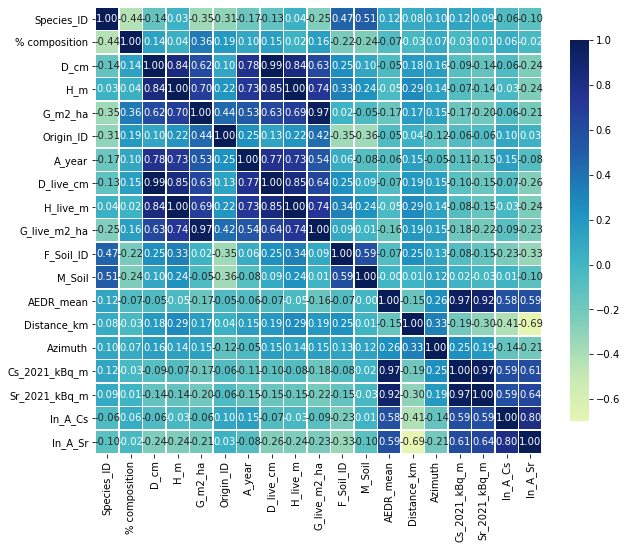

In [8]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['Species_ID', 'D_cm', 'H_m', 'G_m2_ha',
                                    'A_year', 'F_Soil_ID', 'AEDR_mean'])
y = pd.DataFrame(select, columns= ['ln_A_Cs'])

In [10]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_value = np.random.normal(10, 2, size=count)
    X['Random_col'] = norm_value
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [11]:
# Columns in "X" data collections
X.head()

,Species_ID,D_cm,H_m,G_m2_ha,A_year,F_Soil_ID,AEDR_mean
0,0,9.173331,8.917017,26.454278,20,3,0.141667
1,5,10.248202,20.161437,12.869754,40,3,10.249524
2,2,17.188036,20.614192,32.488588,30,2,0.381538
3,0,22.133120,13.684873,36.940844,20,2,0.552581
4,2,28.217794,27.000746,25.643676,57,2,0.204412


In [12]:
# Columns in "y" data collections
y.head()

,ln_A_Cs
0,1.945910
1,4.394449
2,2.833213
3,2.397895
4,2.564949


# Create first XGBoost model for estimate varibiality of output stats

In [13]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [14]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [15]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [16]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=4, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.7065616779553854, 0.7378815239121272, 0.785398022814046, 0.6713165212340501]
    Mean: 0.725
    Std: 0.042

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.07131394 1.24723802 1.21750212 0.87831068]
    Mean: 1.104
    Std: 0.146

 --------------------
Mean absolute error (MAE): 

    Scores: [0.766330031520254, 0.8015592955652058, 0.7060701419099681, 0.9736742026788094]
    Mean: 0.812
    Std: 0.099

 --------------------


# Find optimal hyperparameters for XGBoost model

In [17]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [18]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=3000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y, eval_metric="rmse")

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
Model with rank: 1
Mean validation score: -0.026 (std: 0.915)
Parameters: {'colsample_bytree': 0.6770642459868581, 'gamma': 0.1863184876162866, 'learning_rate': 0.1354475314452787, 'max_depth': 3, 'n_estimators': 159, 'subsample': 0.9411648912889603}



In [19]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.35212355, 0.67062607, 0.20073791, ..., 0.45020633, 0.39840884,
       0.26625342]), 'std_fit_time': array([0.01426306, 0.02668239, 0.00842715, ..., 0.00259178, 0.03316977,
       0.0309288 ]), 'mean_score_time': array([0.01036091, 0.01044493, 0.01023293, ..., 0.01181016, 0.01153107,
       0.01339912]), 'std_score_time': array([2.22241589e-04, 2.14507378e-04, 6.30175494e-04, ...,
       2.27085085e-04, 3.93676365e-05, 3.40347331e-03]), 'param_colsample_bytree': masked_array(data=[0.19401946260313135, 0.9093293079845008,
                   0.22525620997685647, ..., 0.22094138605161767,
                   0.17387967526538362, 0.21942109399224652],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.362224704997322, 0.0015664817524634334,
                   0.1825189943100688, ..., 0.23881054387901496,
                   0.34733434644592925, 0.1369716259670865],


In [20]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.6770642459868581
Gamma: 0.1863184876162866
Learning_rate: 0.1354475314452787
Max_depth: 3
N_estimators: 159
Subsample: 0.9411648912889603


# Creating a basic XGBoost model

In [30]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [31]:
# Generate test and training samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
# Implementation of the scikit-learn API for XGBoost regression
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [33]:
# Show all parameters of XGBoost model
print(xgb_model)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.6770642459868581,
             enable_categorical=False, eval_metric=['rmse'],
             gamma=0.1863184876162866, gpu_id=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1354475314452787,
             max_delta_step=None, max_depth=3, min_child_weight=None,
             missing=nan, monotone_constraints=None, n_estimators=159,
             n_jobs=None, num_parallel_tree=None, predictor=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=0.9411648912889603,
             tree_method=None, validate_parameters=None, verbosity=None)


In [34]:
# Fitting the model 
xgb_model.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_train, y_train), (X_test, y_test)])
# learning dynamics
y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)

[0]	validation_0-rmse:5.16660	validation_1-rmse:5.14594
[1]	validation_0-rmse:4.58070	validation_1-rmse:4.56085
[2]	validation_0-rmse:4.07804	validation_1-rmse:4.04791
[3]	validation_0-rmse:3.58686	validation_1-rmse:3.57965
[4]	validation_0-rmse:3.15099	validation_1-rmse:3.16733
[5]	validation_0-rmse:2.78530	validation_1-rmse:2.83246
[6]	validation_0-rmse:2.51046	validation_1-rmse:2.55598
[7]	validation_0-rmse:2.23201	validation_1-rmse:2.29985
[8]	validation_0-rmse:1.99103	validation_1-rmse:2.07251
[9]	validation_0-rmse:1.82048	validation_1-rmse:1.90383
[10]	validation_0-rmse:1.67694	validation_1-rmse:1.76153
[11]	validation_0-rmse:1.51663	validation_1-rmse:1.61802
[12]	validation_0-rmse:1.38090	validation_1-rmse:1.49043
[13]	validation_0-rmse:1.28154	validation_1-rmse:1.41939
[14]	validation_0-rmse:1.21116	validation_1-rmse:1.35664
[15]	validation_0-rmse:1.11501	validation_1-rmse:1.26858
[16]	validation_0-rmse:1.03806	validation_1-rmse:1.20473
[17]	validation_0-rmse:0.97494	validation

/home/dima/anaconda3/lib/python3.8/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [35]:
# Iteration with the best result
optimal_n= xgb_model.best_ntree_limit-1
print("The best iteration: " + str(optimal_n))    

The best iteration: 138


In [36]:
# Preparing data for building a learning graph
results = xgb_model.evals_result()

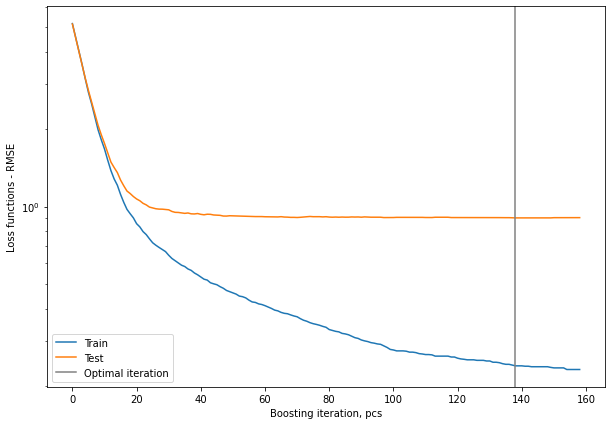

In [37]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(results['validation_0']['rmse'], label='Train')
plt.plot(results['validation_1']['rmse'], label='Test')
plt.axvline(optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a basic XGBoost model

# Test (validation) observations

In [38]:
# Convert data to 'array' type
conv_y_pred = pd.DataFrame(y_pred) # Double transformation
y_pred2 = conv_y_pred.values
y_test2 = y_test.values

# Intermediate results
n_sample = len(y_pred2)
main_sample = y_test.sum() / n_sample

# Calculation of bias
diff = y_pred2 - y_test2
bias = diff.sum()
print('Bias: %.1f' % (bias/n_sample))
print("Relative bias(%):", " %.2f" % (bias/main_sample))

# Calculation of RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %.1f" % (rmse))
print("Relative RMSE(%):", " %.3f" % (rmse/main_sample))

# Calculation of MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.1f" % (mse))

# Calculation of Square R
R_square = r2_score(y_test, y_pred)
print("R square: %.1f%%" % (R_square * 100.0))

Bias: 0.0
Relative bias(%):  0.14
RMSE: 0.9
Relative RMSE(%):  0.151
MSE: 0.8
R square: 79.9%


In [39]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [40]:
# Convert input data
x_test_conv = np.array(y_test)
x_test_convert = np.array([None]*n_sample)
for i in range(n_sample):
    x_test_convert[i] = np.float(x_test_conv[i])

x_plot = x_test_convert
y_plot = y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 1.316
a1: 0.781
R^2: 0.799
Uncertainty
a0: 1.32+/-0.32
a1: 0.78+/-0.05


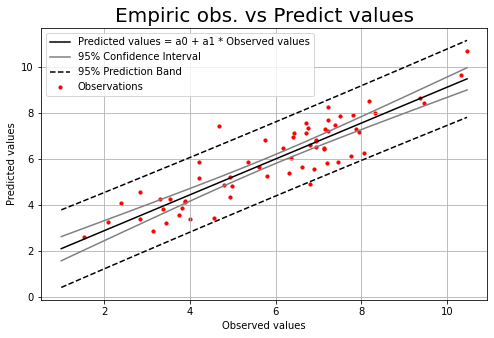

In [41]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# All observations

/home/dima/anaconda3/lib/python3.8/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


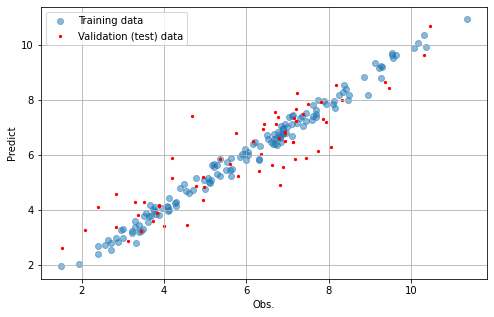

In [42]:
# Comparison of training and testing prediction values for XGBoost model 
y_pred_train = xgb_model.predict(X_train, ntree_limit=xgb_model.best_ntree_limit)

plt.figure(figsize =(8, 5))
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Training data')
plt.scatter(y_test, y_pred, s = 5, c = "red", label='Validation (test) data')
plt.xlabel('Obs.')
plt.ylabel('Predict')
plt.grid(True)
plt.legend(loc='best')

# Estimation training sample

In [43]:
# Convert data to 'array' type
conv_y_pred = pd.DataFrame(y_pred_train) # Double transformation
y_pred_train2 = conv_y_pred.values
y_train2 = y_train.values

# Intermediate results
n_sample = len(y_pred_train2)
main_sample = y_train.sum() / n_sample

# Calculation of bias
diff = y_pred_train2 - y_train2
bias = diff.sum()
print('Bias: %.1f' % (bias/n_sample))
print("Relative bias(%):", " %.2f" % (bias/main_sample))

# Calculation of RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE: %.1f" % (rmse))
print("Relative RMSE(%):", " %.3f" % (rmse/main_sample))

# Calculation of MSE
mse = mean_squared_error(y_train, y_pred_train)
print("MSE: %.1f" % (mse))

# Calculation of Square R
R_square = r2_score(y_train, y_pred_train)
print("R square: %.1f%%" % (R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.08
RMSE: 0.2
Relative RMSE(%):  0.040
MSE: 0.1
R square: 98.7%


In [44]:
# Convert input data
x_train_conv = np.array(y_train)
x_train_convert = np.array([None]*n_sample)
for i in range(n_sample):
    x_train_convert[i] = np.float(x_train_conv[i])

x_plot = x_train_convert
y_plot = y_pred_train
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 0.236
a1: 0.960
R^2: 0.988
Uncertainty
a0: 0.24+/-0.06
a1: 0.960+/-0.009


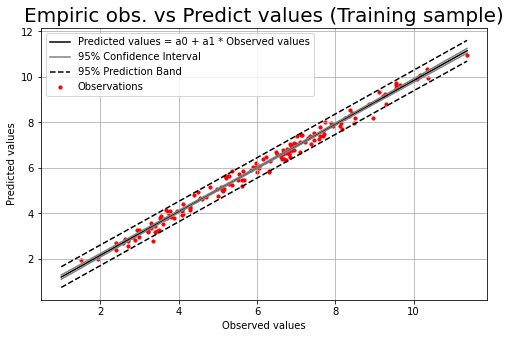

In [45]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values (Training sample)', fontsize=20, color="black")
plt.show()

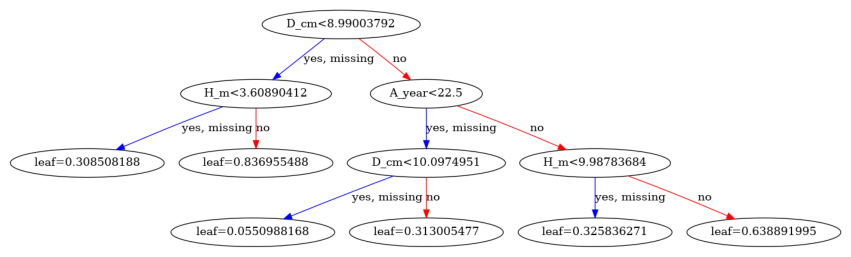

In [50]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(xgb_model,num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [15, 45]
plt.show()

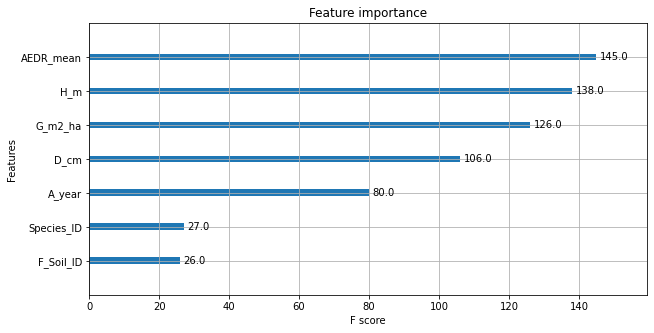

In [52]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

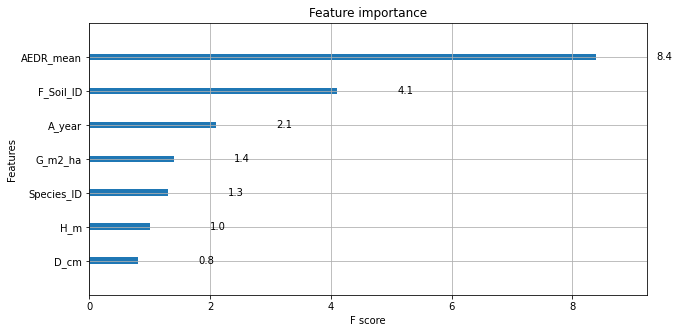

In [53]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

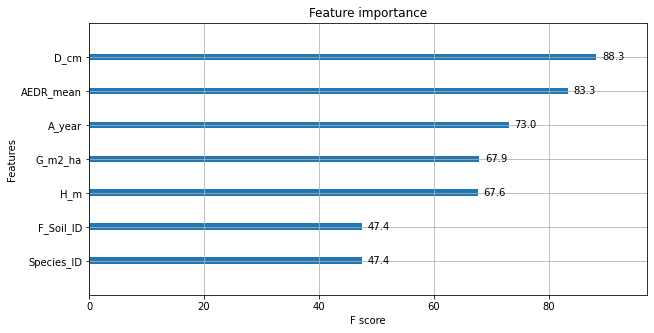

In [54]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [55]:
# Load SHAP`s library
import shap

In [56]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


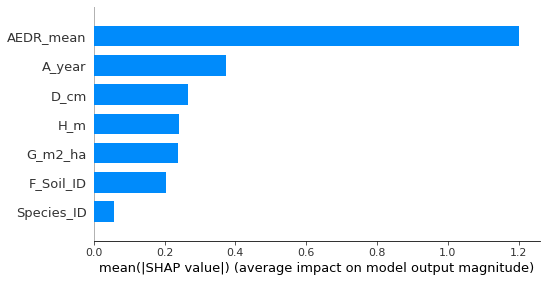

In [57]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, X_train, plot_type="bar")

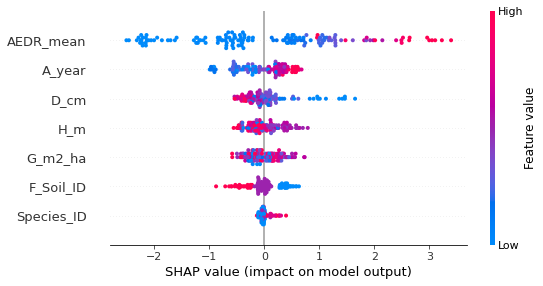

In [58]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, X_train)

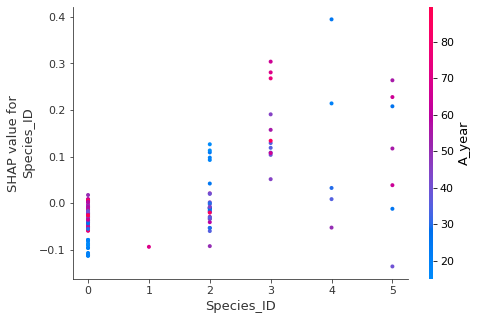

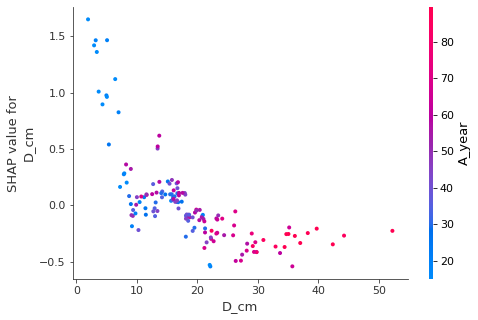

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


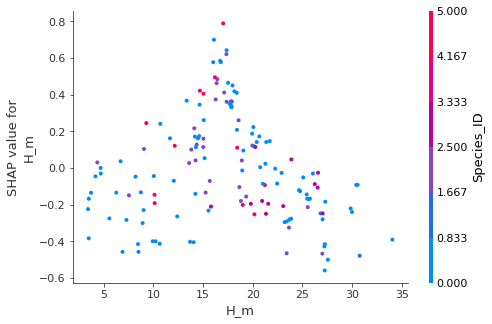

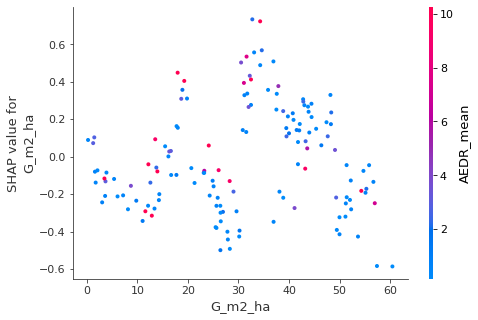

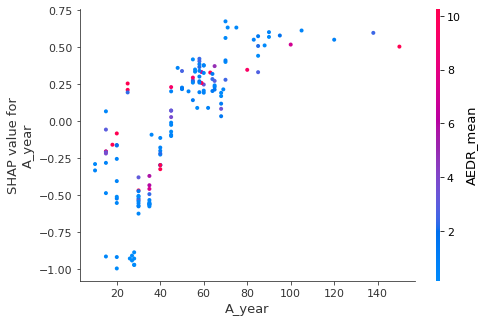

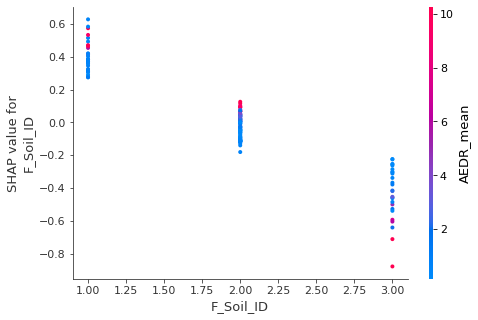

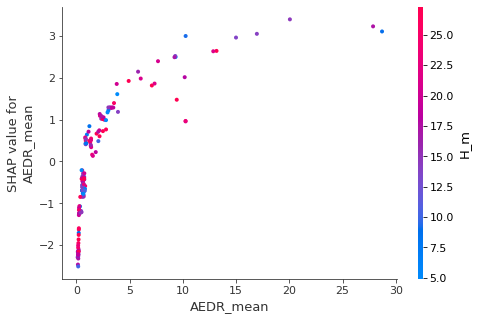

In [59]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_train, color=shap_values)

# ***Training on all data***

# Creating a final XGBoost model

In [60]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [61]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [62]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:5.15072
[1]	validation_0-rmse:4.54824
[2]	validation_0-rmse:3.97696
[3]	validation_0-rmse:3.48816
[4]	validation_0-rmse:3.07432
[5]	validation_0-rmse:2.72114
[6]	validation_0-rmse:2.44413
[7]	validation_0-rmse:2.21329
[8]	validation_0-rmse:2.02098
[9]	validation_0-rmse:1.80769
[10]	validation_0-rmse:1.63027
[11]	validation_0-rmse:1.47571
[12]	validation_0-rmse:1.34908
[13]	validation_0-rmse:1.25970
[14]	validation_0-rmse:1.18486
[15]	validation_0-rmse:1.09707
[16]	validation_0-rmse:1.04262
[17]	validation_0-rmse:0.98009
[18]	validation_0-rmse:0.92480
[19]	validation_0-rmse:0.89385
[20]	validation_0-rmse:0.85931
[21]	validation_0-rmse:0.82204
[22]	validation_0-rmse:0.79137
[23]	validation_0-rmse:0.77058
[24]	validation_0-rmse:0.74684
[25]	validation_0-rmse:0.72576
[26]	validation_0-rmse:0.70674
[27]	validation_0-rmse:0.69119
[28]	validation_0-rmse:0.67816
[29]	validation_0-rmse:0.66939
[30]	validation_0-rmse:0.65893
[31]	validation_0-rmse:0.64897
[32]	validation_0-

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [63]:
# Iteration with the best result
f_optimal_n = xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 138


In [64]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

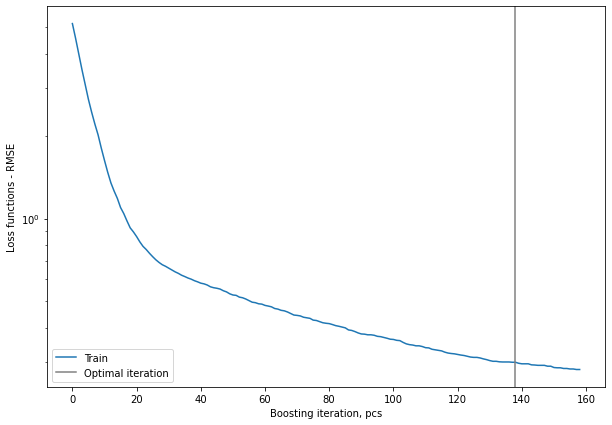

In [65]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [66]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.04
RMSE: 0.3
Relative RMSE(%):  0.047
MSE: 0.1
R square: 98.2%


In [67]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = np.float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 0.264
a1: 0.956
R^2: 0.983
Uncertainty
a0: 0.26+/-0.06
a1: 0.956+/-0.009


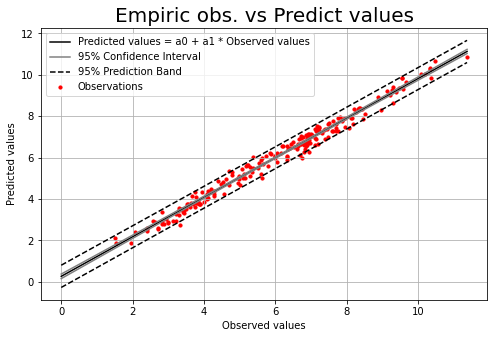

In [68]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(0.001, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# *Save XGBoost model*

In [70]:
# Save to JSON
xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/4_RN_content_in_wood/Output_pred_data/xgb_model_LN_Cs_without_geo.json")
# Save to text format
xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/4_RN_content_in_wood/Output_pred_data/xgb_model_LN_Cs_without_geo.txt")